[Reference](https://medium.com/biased-algorithms/dbscan-for-outlier-detection-in-python-d24a9c949a50)

# Generate and load a dataset

In [1]:
from sklearn.datasets import make_blobs
import numpy as np

# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Take a look at the first few rows
print(X[:5])

[[ 0.83685684  2.13635938]
 [-1.4136581   7.40962324]
 [ 1.15521298  5.09961887]
 [-1.01861632  7.81491465]
 [ 1.27135141  1.89254207]]


# Choosing the Right Parameters

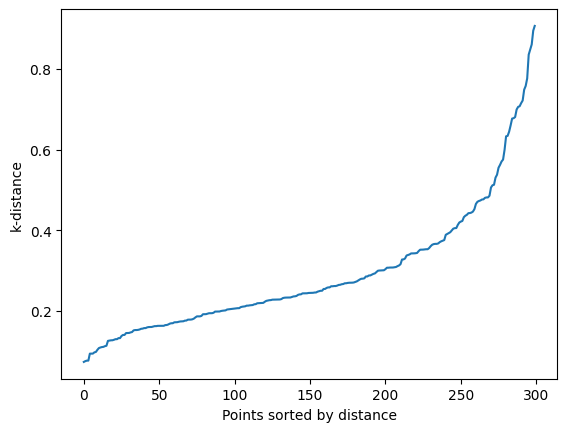

In [2]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Compute k-distance graph
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

# Sort and plot distances
distances = np.sort(distances[:, 3], axis=0)
plt.plot(distances)
plt.ylabel('k-distance')
plt.xlabel('Points sorted by distance')
plt.show()

# DBSCAN for Outlier Detection


In [3]:
from sklearn.cluster import DBSCAN

# Run DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(X)

# Extract labels and core samples
labels = dbscan.labels_
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

# Identifying Outliers

In [4]:
# Outliers
outliers = X[labels == -1]
print("Outliers detected:\n", outliers)

Outliers detected:
 [[ 8.36856841e-01  2.13635938e+00]
 [ 1.27135141e+00  1.89254207e+00]
 [ 3.43761754e+00  2.61654166e-01]
 [-1.80822253e+00  1.59701749e+00]
 [-2.04932168e-01  8.43209665e+00]
 [-2.67000792e+00  8.35389140e+00]
 [-2.22783649e+00  6.89479938e+00]
 [ 1.45513831e+00 -2.91989981e-02]
 [-5.55523811e-01  4.69595848e+00]
 [-2.88024255e+00  2.30437816e+00]
 [ 1.87271752e+00  4.18069237e+00]
 [-1.13121396e+00  6.76652230e+00]
 [-2.62142780e+00  7.98635066e+00]
 [-4.74920358e-02  5.47425256e+00]
 [ 1.75644805e+00  2.05538289e+00]
 [-4.15017659e-02  7.80870276e+00]
 [-1.14091533e+00  1.97550822e+00]
 [-1.54994580e+00  9.28293222e+00]
 [-2.66676007e+00  7.84766052e+00]
 [-4.87271301e-01  3.32858293e+00]
 [ 1.25471244e+00  8.96331565e-02]
 [-2.04758277e+00  6.65428520e+00]
 [-1.95575053e+00  8.61631686e+00]
 [ 2.72396035e-01  5.46996004e+00]
 [-3.12240736e+00  3.28167398e+00]
 [ 1.66909648e+00 -4.36378231e-01]
 [ 2.43934644e+00 -7.25099666e-02]
 [-1.31454942e+00  6.83904013e+00]


# Visualize the Results

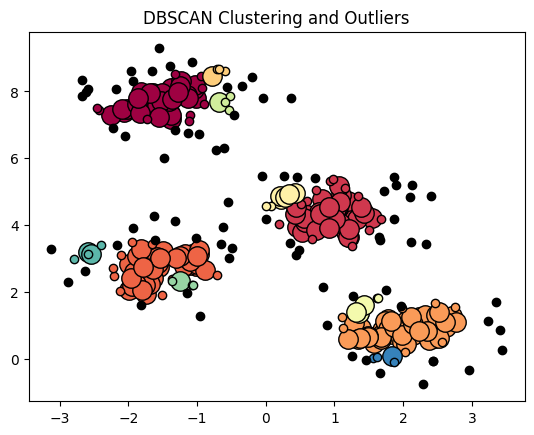

In [5]:
import matplotlib.pyplot as plt

# Plotting the clusters
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  # Black for noise

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('DBSCAN Clustering and Outliers')
plt.show()